
<h1 align ="center" style = "color:blue">  Implémentation CNN</h1>
<h3 align ="center" style = "color:blue">Mohamed walid hajoub SIDSD0001/21 </h3>

### importer Bibliothéque

In [1]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

### importer Dataset

Text(0.5, 1.0, 'Nombre : 5')

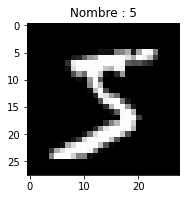

In [2]:
#loading data
(X_train,y_train) , (X_test,y_test) = mnist.load_data()
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Nombre : {}".format(y_train[0]))



### Dimension

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Redimensionner

In [4]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Normalisation
mettre les variables de dataset sur la même échelle 

utilisent min/max
${X = \frac{X - min}{max - min}}$

In [5]:
X_train=X_train/255
X_test=X_test/255

### defini le modele

In [6]:
#defining model
model=Sequential()

### ajouter convolution layer
 - les filtres : valeur entière qui détermine également le nombre de filtres de sortie dans la convolution.
 - taille noyau :  détermine les dimensions du noyau. Les dimensions courantes incluent 3 × 3, 5 × 5 et 7 × 7 qui peuvent être transmises comme tuples (1, 1), (3, 3), (5, 5) ou (7, 7).
 - Strid : spécifiant le "pas" de la convolution 
 - padding de la classe Keras Conv2D peut prendre l'une des deux valeurs suivantes : **'valid'** ou **'same'**.
"valid"signifie pas de padding. "same" entraîne un remplissage uniforme à gauche/droite ou haut/bas de l'entrée de sorte que la sortie ait la même dimension hauteur/largeur que l'entrée.
-  vister ce lien https://www.geeksforgeeks.org/keras-conv2d-class/ pour plus d'information

In [7]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

### ajouter Pooling layer
 => plus d'information:  https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

In [8]:
model.add(MaxPool2D(2,2))

### Aplatir 3D -> 1D 

In [9]:
model.add(Flatten())

### Ajouter fully connected layer
- units : Entier positif, dimensionnalité de l'espace de sortie.
- activation : Fonction d'activation à utiliser. Si vous ne spécifiez rien, aucune activation n'est appliquée (c'est-à-dire une activation "linéaire": a(x) = x).
- use_bias : booléen, si la couche utilise un vecteur de biais.
- kernel_initializer : Initialiseur pour la kernelmatrice des poids.
- bias_initializer : Initialiseur pour le vecteur de biais.
- kernel_regularizer : Fonction de régularisation appliquée à la kernelmatrice des poids.
.

In [10]:
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

### Compiler est entrainner Modele

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model=model.fit(X_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1504 - accuracy: 0.9560
Epoch 2/6
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0536 - accuracy: 0.9833
Epoch 3/6
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0363 - accuracy: 0.9884
Epoch 4/6
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0236 - accuracy: 0.9922
Epoch 5/6
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 6/6
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0133 - accuracy: 0.9959


### Evaluer Modele

In [ ]:

test_eval = model.evaluate(X_test,y_test)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])